In [246]:
%load_ext autoreload
%autoreload 2
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)
import pandas as pd
import numpy as np
import numpy.random as npr
import utils as helper
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Q1
[Link](https://drive.google.com/open?id=14LtcG0TheEuIQeAGzeIpiOQZjeZXIeSg) to the pen paper solutions.

---

# Q2
Custom functions for differnt ways to calculate theta.

In [247]:
# reading data
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)

# Normalizing the data
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

# breaking data
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
tupl = train_test_split(X.values, y.values, test_size = .3)
X_train, X_test, y_train, y_test = tupl
X_train[:3, :]

/home/apoorv/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.54545459, 0.36986301, 0.35031012, 0.3       , 0.32452739,
        0.43196032],
       [0.09090906, 0.        , 0.02861841, 0.6       , 0.29217159,
        0.69991374],
       [0.81818188, 0.4086758 , 0.27221897, 0.3       , 0.42704799,
        0.44565452]])

In [260]:
from lregress import normalEquationRidgeRegression
theta = normalEquationRidgeRegression(X_train, y_train, lmbd=0.1)
print ("normalEquationRidgeRegression:\n", theta)

from lregress import coodrdinateDescentRegression
theta = coodrdinateDescentRegression(X_train, y_train, it=200)
print ("coodrdinateDescentRegression:\n", theta)

from lregress import sgdRegression
theta = sgdRegression(X_train, y_train, alpha = 0.003, it=200)
print ("sgdRegression:\n", theta)

from lregress import coodrdinateDescentLasso
theta = coodrdinateDescentLasso(X_train, y_train, lmbd=.2, it=200)
print ("coodrdinateDescentLasso:\n", theta)

# from lregress import gradientDescentAutogradRegression
theta = gradientDescentAutogradRegression(X, y, alpha=0.001, lmbd=0.1, it=3)
print ("gradientDescentAutogradRegression:\n", theta)

normalEquationRidgeRegression:
 [ 0.19630916  0.03464375 -0.11511074 -0.20826595  0.10207558  0.18869906
  0.0218443 ]
coodrdinateDescentRegression:
 [ 0.20079374  0.03467896 -0.11519366 -0.21252506  0.10185997  0.18802775
  0.0166799 ]
sgdRegression:
 [0.07059753 0.07059753 0.07059753 0.07059753 0.07059753 0.07059753
 0.07059753]
coodrdinateDescentLasso:
 [ 0.19668776  0.03422936 -0.11378692 -0.20728587  0.10230805  0.18774715
  0.02098588]
gradientDescentAutogradRegression:
 [-0.75827148 -0.36047823  0.21600326  0.50914634 -0.40211364 -0.29536523
  0.09761442]


In [257]:
import numpy as np
from autograd import grad
import torch
import autograd.numpy as anp
from torch.autograd import Variable
from utils import prepend_ones_col

def lasso_cost(th, X, y, lmbd):
    y_pred = anp.dot(X, th[:, None])
    error_square = anp.square(y[:, None]-y_pred)
    lasso_error = anp.absolute(th).sum() * (lmbd**2)
    return error_square.sum() + lasso_error
lasso_grad = grad(lasso_cost)
def gradientDescentAutogradRegression(X, y, alpha=0.01, lmbd=0.1, it=300):
    X_new = prepend_ones_col(X)
    X_new = anp.array(X_new)
    y = anp.array(y)
    n, m = X_new.shape
    th = anp.random.rand(m)
    for i in range(it):
        dw = lasso_grad(th, X_new, y, lmbd)
        th = th - alpha*(dw)
    return th


---

# Q4

In [31]:
# data
X = [[1, 2],
     [2, 4],
     [3, 6],
     [4, 8]]
y = [2, 3, 4, 5]
X = np.array(X)
y = np.array(y)

### a)

In [37]:
lr = Ridge(alpha=0.1)
lr.fit(X ,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
print('theta0',lr.intercept_)
print('theta', lr.coef_)

theta0 1.0099601593625498
theta [0.19920319 0.39840637]


### b)

In [44]:
normalEquationRidgeRegression(X, y, lmbd=1)

array([0.44705882, 0.23529412, 0.47058824])

Yes, I am able to learn the theta, see above for the coefficients.

---

# Q5
Using sklearn's RIDGE and LASSO modules after normalizing the data.

In [200]:
# reading data
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)

# Normalizing the data
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

/home/apoorv/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**a)** Ridge Regression

In [201]:
def cross(dTrain, depths, num_valid, clf):
    folds = make_folds(dTrain, num_valid)
    passed_folds = folds[:-1] # holding out test
    k, acc= best_k(passed_folds, depths, clf)
    acc = 0
    curr_fold_train = folds[:-1]
    curr_fold_train = pd.concat(curr_fold_train)
    curr_fold_test = folds[-1]
    linear_reg = clf(alpha=k)
    linear_reg.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
    my_preds = linear_reg.predict(curr_fold_test.iloc[:, :-1])
    true = curr_fold_test.iloc[:, -1].values
    my_acc = mean_squared_error(true, my_preds)
    return {"Lambda": k, "TEST mse": my_acc}   

def make_folds(dTrain, num_valid):
    '''Make a number of folds with diven pd'''
    train = shuffle(dTrain)
    last = train.shape[0]
    folds = []
    for i in range(num_valid):
        start = i*int(last/num_valid)
        end = (i+1)*int(last/num_valid)
        if end >= last:
            end = -1
        folds.append(train.iloc[start:end, :])
    return folds

def best_k(folds, depths, clf):
    '''return lambda that maximizes the avg accuracy'''
    num_valid = len(folds)
    acc = {}
    train_acc = {}
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_validation = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        for k in depths:
            linear_reg = clf(alpha=k)
            linear_reg.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
            my_preds = linear_reg.predict(curr_fold_validation.iloc[:, :-1])
            true = curr_fold_validation.iloc[:, -1].values
            my_acc = mean_squared_error(true, my_preds)
            acc[k] = my_acc
            
            my_preds = linear_reg.predict(curr_fold_train.iloc[:, :-1])
            true = curr_fold_train.iloc[:, -1].values
            train_acc = mean_squared_error(true, my_preds)
            
            print(k, "| validation mse: %8.2f"% my_acc) # for showcasing
            print(k, "| train mse: %8.2f"% train_acc) # for showcasing
    acc = {k: acc[k] for k in acc.keys()}
    
    x = acc
    sorted_by_value = sorted(x.items(), key=lambda kv: kv[1])
    return sorted(x[0] for x in sorted_by_value if sorted_by_value[0][1] == x[1])[0], acc

In [202]:
k = cross(data, [0.0, 0.8, 2, 10, 50, 100], 5, Ridge)
print (k)

0.0 | validation mse:     0.00
0.0 | train mse:     0.01
0.8 | validation mse:     0.00
0.8 | train mse:     0.01
2 | validation mse:     0.00
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.01
0.0 | validation mse:     0.01
0.0 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.01
0.0 | validation mse:     0.01
0.0 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.0

**b)** Lasso Regression

In [203]:
k = cross(data, [0.2, 0.8, 2, 10, 50, 100], 5, Lasso)
print (k)

0.2 | validation mse:     0.01
0.2 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.01
0.2 | validation mse:     0.01
0.2 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.01
0.2 | validation mse:     0.01
0.2 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.0

**c)** Making the Lasso and Regression paths

In [207]:
ks = [0.1, 0.2, 0.4, 1.8, 2, 2.4,
      2.9, 3, 4, 9, 10, 13, 15, 24,
      34, 77, 88, 99, 120, 200, 300, 500,
      800, 1100, 1110, 2000, 3000]

rth = []
lth = []
for k in ks:
    lr = Ridge(alpha=k)
    lr.fit(X_train, y_train)
    thetta = lr.coef_
    thettas = [lr.intercept_] + thetta
    rth.append(thettas)

    lr = Lasso(alpha=k)
    lr.fit(X_train, y_train)
    lr.coef_
    lr.intercept_
    thettas = [lr.intercept_] + thetta
    lth.append(thettas)

rth = np.array(rth)
lth = np.array(lth)

In [208]:
rth[:, 1] # one theta over lambdas

array([0.13808876, 0.13205162, 0.12234784, 0.09533477, 0.09414131,
       0.09264382, 0.09196823, 0.09195145, 0.09320648, 0.11146799,
       0.11542327, 0.12665007, 0.13350424, 0.15857527, 0.1783088 ,
       0.22087431, 0.22673827, 0.23159446, 0.23887488, 0.25438343,
       0.26316961, 0.27078244, 0.27531754, 0.27744343, 0.27749501,
       0.28005007, 0.28112989])

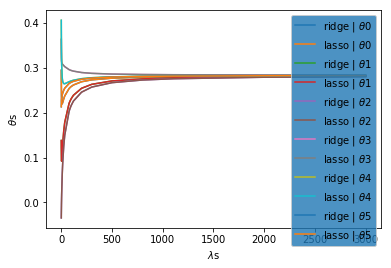

In [209]:
# make main subplot
fig, ax = plt.subplots()


for i in range(len(rth[0])):
    ridgeth = rth[:, i]
    lassoth = lth[:, i]
    ax.plot(ks, ridgeth, label=r'ridge | $\theta$' + str(i))
    ax.plot(ks, ridgeth, label=r'lasso | $\theta$' + str(i))

ax.set_ylabel(r"$\theta$s")
ax.set_xlabel(r"$\lambda$s")

legend = ax.legend()#loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
map_X, map_Y = np.meshgrid(theta0_grid, theta1_grid)
ax[0].scatter(x, Y, marker='x', s=40, color='k')
contours = ax[1].contour(map_Y, map_X, J_grid, 30)
ax[1].clabel(contours)
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
line, = ax[0].plot([], [], color='r', lw=2,label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*Theta[0]))
def animate(i):
   '''ax[0].plot(X, predict(Theta[i], X), color='r', lw=2,
              label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*Theta[i]))'''
   #ax[1].scatter(Theta[i][0], Theta[i][1], s=40, lw=0)
   z = predict(Theta[i], X)
   line.set_data(X[:, 1], z)
   ax[1].annotate('', xy=Theta[i], xytext=Theta[i-1],arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1}, va='center', ha='center')
   #ax[0].plot(X, predict(Theta[i], X), color='r', lw=2,label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*Theta[i]))
   return ax

#anim = animation.FuncAnimation(fig, animate, frames=10, interval=20, blit=True)
anim = animation.FuncAnimation(fig, animate, frames=1000, interval=20, blit=True)
#HTML(anim.to_html5_video())
anim